In [305]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, codecs, json
from datetime import datetime
from time import time
import string
import re
import io
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import datetime as dt
import string
import unicodedata
from bs4 import BeautifulSoup
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['from', 'subject', 're', 'edu', 'use'])
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

df1 = pd.read_csv(r"C:\Users\Ikshita\Downloads\metoo.csv", encoding="ISO-8859-1")

In [306]:
df = df1[['text','favoriteCount','retweetCount']]
tweet_dictionary = {}
for ind,val in enumerate(df.text):
    tweet_dictionary.update({ind:val})
tweet_dictionary[0]

'American Harem.. #MeToo https://t.co/HjExLJdGuF'

#### Top 10 Most Liked Tweets

In [307]:
df = df.sort_values(by='favoriteCount', ascending=False)
top10_liked = df.head(10)
pd.set_option('display.max_colwidth', -1)
top10_liked

,text,favoriteCount,retweetCount
362725,"Just reported @Rosie for targeted harassment, mainly to see if Twitter does indeed have a double standard. Everyoneâ¦ https://t.co/JkBNiAhk2q",45922,13598
81059,At the very same time that we are asking Franken to resign from senate -- we are allowing an accused child molesterÛ_ https://t.co/qsq5vqmKbY,40680,15802
49278,"I mean, what world are we living in that an accused sexual abuser is allowed to be our President and an accused pedÛ_ https://t.co/yP4GXMtyMS",32658,10195
198174,"Ten years ago, @TaranaBurke created the #MeToo movement to tell young women of color who had survived sexual assaulâ¦ https://t.co/x9IrAxozgj",18926,6018
271795,Shout out to all the strong and beautiful women out there who have given the world their story using #metoo . Shoutâ¦ https://t.co/H3VTkFLjRQ,18508,5799
271003,Shout 2 the ones that are quiet &amp; refuse to confront their pain. Rape culture has made us a society of #metoo . Eacâ¦ https://t.co/RUXCATX7UE,16378,4989
31597,"Terry Crews is a stand-up guy. Literally one of the nicest people in our industry. He is honest, kind &amp; true profesÛ_ https://t.co/I9g9CuLCyQ",14762,4519
31331,Full list of sexual misconduct allegations against the President of the United States of America. #MeToo https://t.co/RLPOtPyYVt,11441,7423
165831,.@realDonaldTrump-\r\rYou sexually assaulted women. You verbally &amp; physically assaulted women. You harassed women. Yâ¦ https://t.co/qKw6PC1bfu,11037,5618
185323,Rep. Speier becomes the 9th Member of Congress to call on Trump to resign: Trump's comments about Gillibrand 'groteâ¦ https://t.co/zEzg77aWET,10609,5314


### Data Preprocessing for Sentiment Analysis

#### Remove HTML Links

In [308]:
for i in range(0,len(tweet_dictionary)):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, tweet_dictionary[i])
    for link in links:
        tweet_dictionary[i] = tweet_dictionary[i].replace(link[0], ', ') 
tweet_dictionary[0]

<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-308-136725b37d97>:2: DeprecationWarning: invalid escape sequence \w
  link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)


'American Harem.. #MeToo , '

Expand contractions

In [309]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "i'm": "i am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    text = c_re.sub(replace, text.lower())
    return text
for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=expandContractions(tweet_dictionary[i])

#### Remove Handle and Mention

In [310]:

def remove_handle_mention(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=remove_handle_mention(tweet_dictionary[i])

#### Remove RT

In [311]:
for i in range(0,len(tweet_dictionary)):
    if tweet_dictionary[i].startswith("b rt"):
        tweet_dictionary[i] = tweet_dictionary[i][4:]
    else:
        tweet_dictionary[i] = tweet_dictionary[i][2:]
#     tweet_dictionary[i] = tweet_dictionary[i].replace('RT', '')

#### Remove Special Characters

In [312]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
for i in range(0,len(tweet_dictionary)):
    tweet_dictionary[i]=remove_special_characters(tweet_dictionary[i], 
                          remove_digits=True)
tweet_dictionary[0]

'erican harem'

### Sentiment Analysis (VADER)

In [313]:
snt = analyser.polarity_scores('I AM SAD')
snt

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [314]:
for i in range(0,len(df)):
    snt = analyser.polarity_scores(tweet_dictionary[i])
    df.at[i,'vader_comp'] = snt['compound']
    df.at[i,'vader_pos'] = snt['pos']
    df.at[i,'vader_neu'] = snt['neu']
    df.at[i,'vader_neg'] = snt['neg']

In [315]:
df.head()

,text,favoriteCount,retweetCount,vader_comp,vader_pos,vader_neu,vader_neg
362725,"Just reported @Rosie for targeted harassment, mainly to see if Twitter does indeed have a double standard. Everyoneâ¦ https://t.co/JkBNiAhk2q",45922,13598,-0.5423,0.000,0.811,0.189
81059,At the very same time that we are asking Franken to resign from senate -- we are allowing an accused child molesterÛ_ https://t.co/qsq5vqmKbY,40680,15802,-0.7845,0.000,0.683,0.317
49278,"I mean, what world are we living in that an accused sexual abuser is allowed to be our President and an accused pedÛ_ https://t.co/yP4GXMtyMS",32658,10195,-0.7906,0.000,0.704,0.296
198174,"Ten years ago, @TaranaBurke created the #MeToo movement to tell young women of color who had survived sexual assaulâ¦ https://t.co/x9IrAxozgj",18926,6018,0.6486,0.275,0.725,0.000
271795,Shout out to all the strong and beautiful women out there who have given the world their story using #metoo . Shoutâ¦ https://t.co/H3VTkFLjRQ,18508,5799,0.8020,0.286,0.714,0.000


In [316]:
num_tweets= len(df)
vad_num_pos = len(df[df['vader_comp']>.1])
vad_num_neg = len(df[df['vader_comp']< -.1])
vad_num_neu = len(df[(df['vader_comp']< .1) & (df['vader_comp']>-.1)])

print('According to VADER, there are %d tweets, of which %d are positive and %d are negative while %d tweets are neutral' 
      %(num_tweets,vad_num_pos,vad_num_neg,vad_num_neu))

According to VADER, there are 393135 tweets, of which 129075 are positive and 143887 are negative while 120173 tweets are neutral


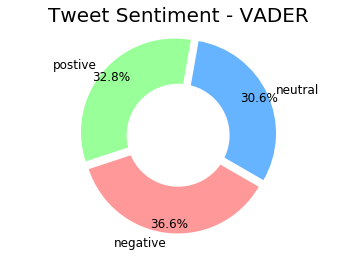

In [317]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['postive','negative','neutral']
sizes = [vad_num_pos,vad_num_neg,vad_num_neu]
colors = ['#99ff99','#ff9999','#66b3ff']
explode = (0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=80, pctdistance=.9, explode = explode,textprops={'fontsize': 12})
#draw circle
centre_circle = plt.Circle((0,0),0.55,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Tweet Sentiment - VADER', size = 20)
plt.axis('equal')  

plt.show()

#### Remove Stopwords

In [318]:
tweets = list(tweet_dictionary.values())

# Remove Stop Words
data_words_nostops = [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in data_words] 
# Form Bigrams
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
bigram_mod = gensim.models.phrases.Phraser(bigram)
data_words_bigrams = [bigram_mod[doc] for doc in data_words_nostops]
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
texts_out = []
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
for sent in data_words_bigrams:
    doc = nlp(" ".join(sent)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
print(texts_out[:1])

[['american', 'harem']]



### Create the Dictionary and Corpus needed for Topic Modeling

In [324]:
# Create Dictionary
id2word = corpora.Dictionary(texts_out)
# Create Corpus
texts = texts_out
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]])

[[('american', 1), ('harem', 1)], [('guy', 1), ('hypocrisy', 1), ('liberal', 1), ('resign', 1)]]


In [325]:
print(id2word)

Dictionary(43520 unique tokens: ['american', 'harem', 'guy', 'hypocrisy', 'liberal']...)


In [326]:
print(texts[1])

['guy', 'resign', 'liberal', 'hypocrisy']


In [327]:
print(corpus[1])

[(2, 1), (3, 1), (4, 1), (5, 1)]


#### Build LDA Model

In [336]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
#Only 3 topics this time for simplicity
num_topics = 12
lda_model_tfidf = models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=id2word, passes=10, workers=10)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.011*"times_square" + 0.010*"opinion" + 0.010*"new" + 0.009*"alabama" + 0.008*"drop" + 0.008*"eve_ball" + 0.007*"year" + 0.007*"push_button" + 0.007*"baseless_accusation" + 0.006*"many"
Topic: 1 Word: 0.022*"wo" + 0.022*"rape" + 0.022*"culture" + 0.022*"society" + 0.021*"refuse" + 0.021*"confront" + 0.021*"make" + 0.021*"pain" + 0.021*"one" + 0.020*"quiet"
Topic: 2 Word: 0.036*"allegation" + 0.032*"state" + 0.031*"united" + 0.031*"president" + 0.030*"misconduct" + 0.028*"sexual" + 0.025*"america" + 0.023*"full" + 0.023*"milano" + 0.023*"list"
Topic: 3 Word: 0.041*"shout" + 0.028*"use" + 0.025*"strong" + 0.024*"world" + 0.024*"give" + 0.024*"beautiful" + 0.020*"story" + 0.013*"woman" + 0.013*"texas_attorney" + 0.013*"pathetic"
Topic: 4 Word: 0.024*"woody" + 0.024*"dylan" + 0.024*"revolution" + 0.023*"allen" + 0.023*"want" + 0.022*"spar" + 0.017*"thank" + 0.017*"second" + 0.015*"stop_chatting" + 0.015*"hi_ladie"
Topic: 5 Word: 0.014*"trump" + 0.013*"woman" + 0.013*"believ

In [ ]:

'''
Topics :
    1) Dylan Farrow - Woody Allen Controversy
    2) Movement Expressions 
    3) Political Party
    4) Trump
    5) Hugh Hewwit
    6) Corey Lewandowski 
    7) Roy Moore & Alabama
    8) Time to Speak Up!
    9) Types of Harrasments
    
    etc..
'''

In [337]:
#assign the highest scoring topic to each tweet
for i in df.index:
    df.at[i,'topic']=sorted(lda_model_tfidf[corpus[i]], key=lambda tup: -1*tup[1])[0][0]
    
df.head()

,text,favoriteCount,retweetCount,vader_comp,vader_pos,vader_neu,vader_neg,topic
362725,"Just reported @Rosie for targeted harassment, mainly to see if Twitter does indeed have a double standard. Everyoneâ¦ https://t.co/JkBNiAhk2q",45922,13598,-0.5423,0.000,0.811,0.189,7.0
81059,At the very same time that we are asking Franken to resign from senate -- we are allowing an accused child molesterÛ_ https://t.co/qsq5vqmKbY,40680,15802,-0.7845,0.000,0.683,0.317,5.0
49278,"I mean, what world are we living in that an accused sexual abuser is allowed to be our President and an accused pedÛ_ https://t.co/yP4GXMtyMS",32658,10195,-0.7906,0.000,0.704,0.296,3.0
198174,"Ten years ago, @TaranaBurke created the #MeToo movement to tell young women of color who had survived sexual assaulâ¦ https://t.co/x9IrAxozgj",18926,6018,0.6486,0.275,0.725,0.000,8.0
271795,Shout out to all the strong and beautiful women out there who have given the world their story using #metoo . Shoutâ¦ https://t.co/H3VTkFLjRQ,18508,5799,0.8020,0.286,0.714,0.000,3.0


### Visualize the topics

In [340]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus_tfidf, id2word)
vis

C:\Users\Ikshita\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.057770  0.015407  1       1        13.018361
5      0.020129  0.082452  2       1        9.194486 
4     -0.124779 -0.413936  3       1        8.996306 
3      0.367188 -0.061762  4       1        8.868261 
7     -0.090634 -0.008063  5       1        8.763492 
10     0.112087  0.023450  6       1        8.743308 
8     -0.111688  0.080426  7       1        8.244874 
0      0.099379 -0.016848  8       1        7.992721 
6     -0.080212  0.102057  9       1        7.053123 
1     -0.083369  0.029365  10      1        6.843600 
11    -0.091751  0.066828  11      1        6.602049 
2     -0.074119  0.100624  12      1        5.679418 , topic_info=      Category          Freq             Term         Total  loglift  logprob
term                                                                         
24     Default  16963.000000  woman            16963.000000  30.0000  30.0000
503    Default  15760.000000  movement         15760.000000  29.0000  29.0000
267    Default  12710.000000  year             12710.000000  28.0000  28.0000
87     Default  11717.000000  man              11717.000000  27.0000  27.0000
27     Default  9875.000000   sexual           9875.000000   26.0000  26.0000
260    Default  8213.000000   want             8213.000000   25.0000  25.0000
363    Default  8026.000000   trump            8026.000000   24.0000  24.0000
80     Default  6934.000000   know             6934.000000   23.0000  23.0000
50     Default  8153.000000   amp              8153.000000   22.0000  22.0000
469    Default  6247.000000   moment           6247.000000   21.0000  21.0000
1072   Default  7900.000000   may              7900.000000   20.0000  20.0000
45     Default  7462.000000   say              7462.000000   19.0000  19.0000
258    Default  6040.000000   story            6040.000000   18.0000  18.0000
23     Default  5562.000000   time             5562.000000   17.0000  17.0000
240    Default  5275.000000   make             5275.000000   16.0000  16.0000
433    Default  4637.000000   thank            4637.000000   15.0000  15.0000
255    Default  4825.000000   girl             4825.000000   14.0000  14.0000
72     Default  4300.000000   get              4300.000000   13.0000  13.0000
1049   Default  4798.000000   hara             4798.000000   12.0000  12.0000
2251   Default  4674.000000   choose           4674.000000   11.0000  11.0000
126    Default  4487.000000   harassment       4487.000000   10.0000  10.0000
3509   Default  3571.000000   liked_video      3571.000000   9.0000   9.0000 
418    Default  4073.000000   feminist         4073.000000   8.0000   8.0000 
42709  Default  4783.000000   girl_spent       4783.000000   7.0000   7.0000 
42711  Default  4783.000000   precious_little  4783.000000   6.0000   6.0000 
42708  Default  4765.000000   entire_lifetime  4765.000000   5.0000   5.0000 
42710  Default  4765.000000   hay_thought      4765.000000   4.0000   4.0000 
453    Default  4764.000000   go               4764.000000   3.0000   3.0000 
273    Default  3609.000000   new              3609.000000   2.0000   2.0000 
720    Default  3749.000000   women            3749.000000   1.0000   1.0000 
...        ...          ...   ...                      ...      ...      ... 
1449   Topic12  1174.747803   fear             1175.100342   2.8680  -3.8251 
688    Topic12  1080.811523   join             1081.164062   2.8680  -3.9085 
2143   Topic12  878.909729    remove           879.262268    2.8679  -4.1153 
851    Topic12  789.273315    crime            789.625854    2.8679  -4.2228 
5829   Topic12  778.693298    honour           779.045898    2.8679  -4.2363 
2548   Topic12  759.177795    accountability   759.530334    2.8679  -4.2617 
990    Topic12  741.441711    survivor         741.794250    2.8678  -4.2853 
1323   Topic12  692.300354    reach            692.652893    2.8678  -4.3539 
131

### Plot the sentiment distribution of tweets by topics

In [341]:

def make_chart(positve, negative, neutral,source):
    # Pie chart
    labels = ['positive','negative','neutral']
    sizes = [positve, negative, neutral]
    colors = ['#99ff99','#ff9999','#66b3ff']
    explode = (0.05,0.05,0.05)
    plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=80, pctdistance=.9, explode = explode,textprops={'fontsize': 12})
    #draw circle
    centre_circle = plt.Circle((0,0),0.55,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Sentiment Distribution for Topic '+str(source), size = 20)
    plt.axis('equal')  



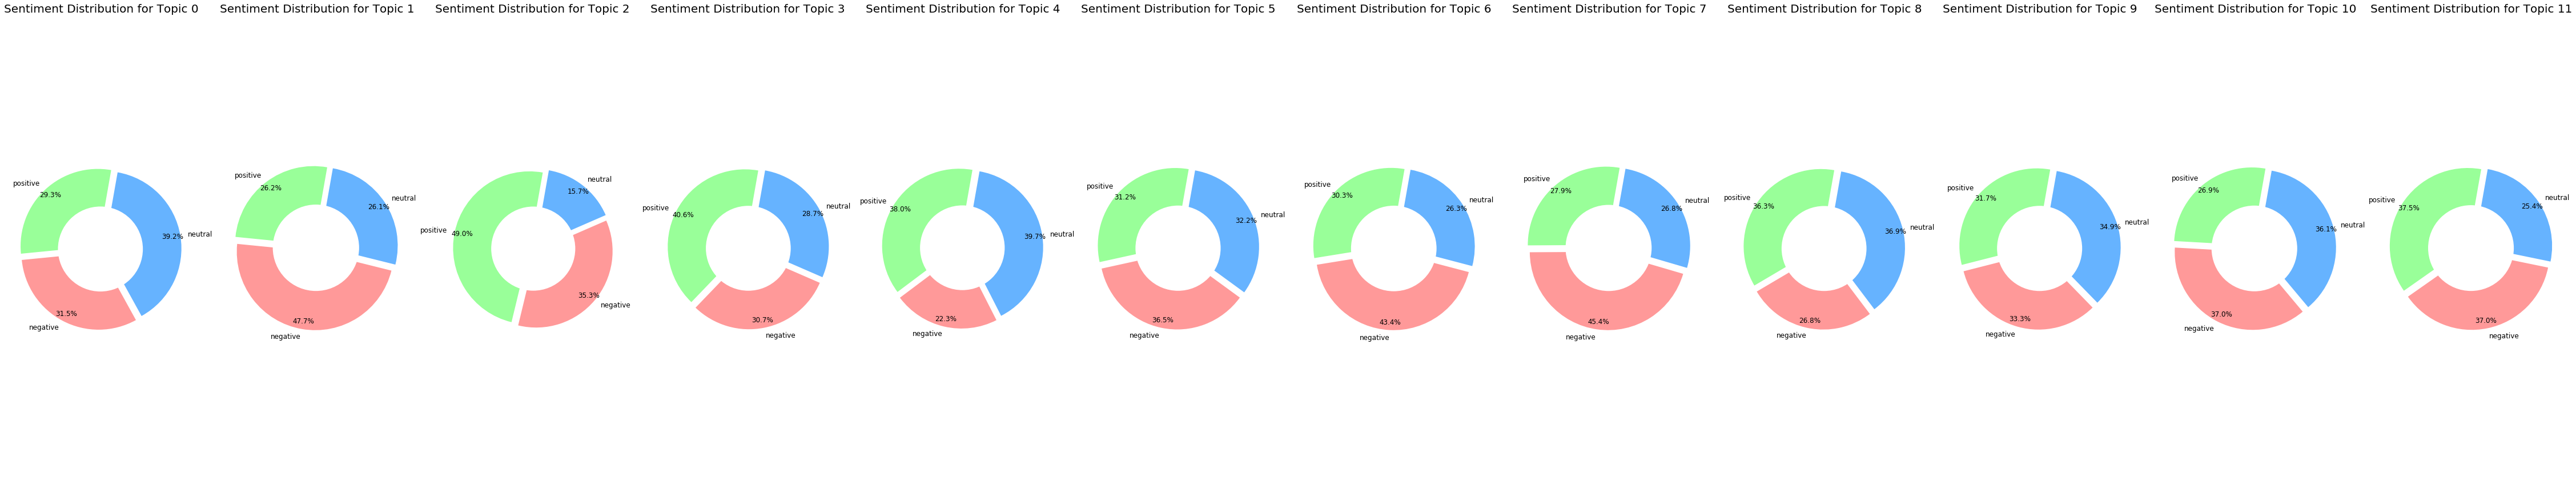

In [355]:
#Some topics are more positive / negative than others
topic=list(range(0,12))
plt.figure(figsize=(80, 15))

for i in topic:
    plt.subplot(1, 12, i+1)
    topic_tweets=df[df['topic']==i]
    num_pos = len(topic_tweets[topic_tweets['vader_comp']>.1])
    num_neg = len(topic_tweets[topic_tweets['vader_comp']< -.1])
    num_neu = len(topic_tweets[(topic_tweets['vader_comp']< .1) & (topic_tweets['vader_comp']>-.1)])
    make_chart(num_pos,num_neg,num_neu,i)


plt.show()

###  Number of negative tweets per Topic

In [356]:
for i in topic:
    topic_tweets=df[df['topic']==i]
    num_neg = len(topic_tweets[topic_tweets['vader_comp']< -.1])
    print("Topic %d has %d negative tweets." % (i, num_neg))

Topic 0 has 11338 negative tweets.
Topic 1 has 11453 negative tweets.
Topic 2 has 7097 negative tweets.
Topic 3 has 9866 negative tweets.
Topic 4 has 5691 negative tweets.
Topic 5 has 10745 negative tweets.
Topic 6 has 20146 negative tweets.
Topic 7 has 26954 negative tweets.
Topic 8 has 7905 negative tweets.
Topic 9 has 7503 negative tweets.
Topic 10 has 12448 negative tweets.
Topic 11 has 12741 negative tweets.
